## 데이터 로드

In [1]:
import pandas as pd

In [49]:
# 데이터 불러오기
data = pd.read_csv("/Users/sehwaryu/Documents/OneDrive/DataSci/파이썬 스터디/coronavirusdataset_20200420/Time.csv", encoding = "cp949")
data

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
87,2020-04-16,0,538775,513894,10613,7757,229
88,2020-04-17,0,546463,521642,10635,7829,230
89,2020-04-18,0,554834,530631,10653,7937,232
90,2020-04-19,0,559109,536205,10661,8042,234


In [50]:
data.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
date         92 non-null object
time         92 non-null int64
test         92 non-null int64
negative     92 non-null int64
confirmed    92 non-null int64
released     92 non-null int64
deceased     92 non-null int64
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


## 결측치 확인

In [52]:
data.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

In [53]:
# 필요없는 칼럼 제거하기
dropped = data.drop(columns = ['time'])
dropped

,date,test,negative,confirmed,released,deceased
0,2020-01-20,1,0,1,0,0
1,2020-01-21,1,0,1,0,0
2,2020-01-22,4,3,1,0,0
3,2020-01-23,22,21,1,0,0
4,2020-01-24,27,25,2,0,0
...,...,...,...,...,...,...
87,2020-04-16,538775,513894,10613,7757,229
88,2020-04-17,546463,521642,10635,7829,230
89,2020-04-18,554834,530631,10653,7937,232
90,2020-04-19,559109,536205,10661,8042,234


## 날짜변수 Split

In [54]:
# 년, 월, 일 Split 함수 만들기
def parse_month(date):
    month = date.split('-')[1]
    month = int(month)
    return month

parse_month('2020-01-21')

1

In [57]:
def parse_date(date):
    day = date.split('-')[-1]
    day = int(day)
    return day

parse_date('2020-01-21')

21

In [69]:
# 월, 일 칼럼 붙이기
dropped['month']=dropped['date'].apply(parse_month)
dropped['day'] = dropped['date'].apply(parse_date)
dropped.drop(columns = 'date')

,test,negative,confirmed,released,deceased,month,day
0,1,0,1,0,0,1,20
1,1,0,1,0,0,1,21
2,4,3,1,0,0,1,22
3,22,21,1,0,0,1,23
4,27,25,2,0,0,1,24
...,...,...,...,...,...,...,...
87,538775,513894,10613,7757,229,4,16
88,546463,521642,10635,7829,230,4,17
89,554834,530631,10653,7937,232,4,18
90,559109,536205,10661,8042,234,4,19


## 그래프 시각화

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

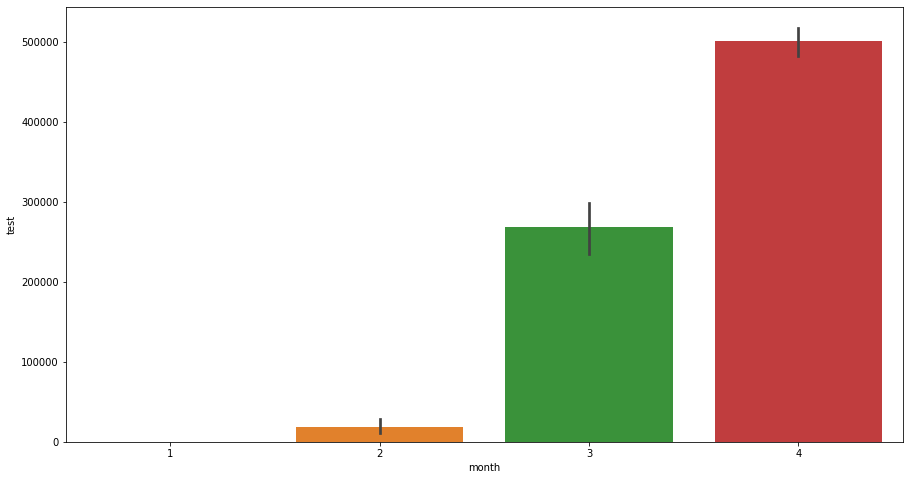

In [107]:
# Number of tests
plt.figure(figsize = (15,8))
sns.barplot(data = dropped, x = 'month', y = 'test')

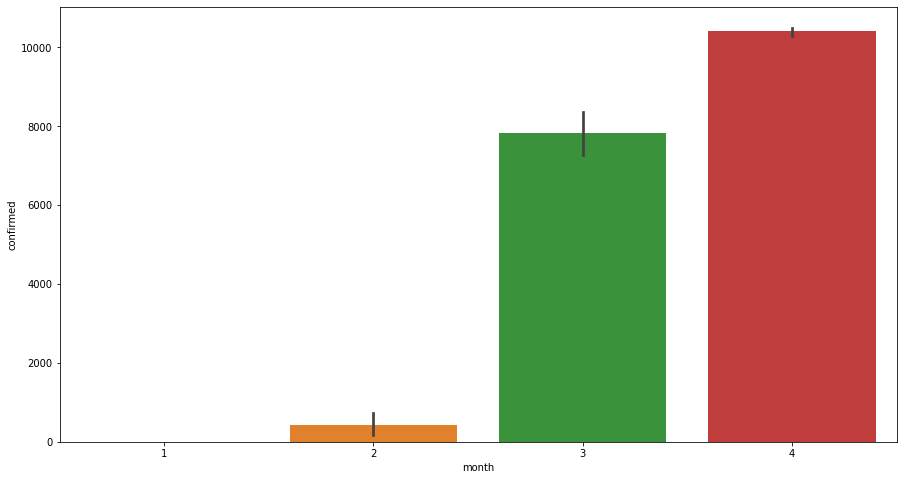

In [105]:
# Number of confirmed cases
plt.figure(figsize = (15,8))
sns.barplot(data = dropped, x = 'month', y = 'confirmed')

Object `plot` not found.


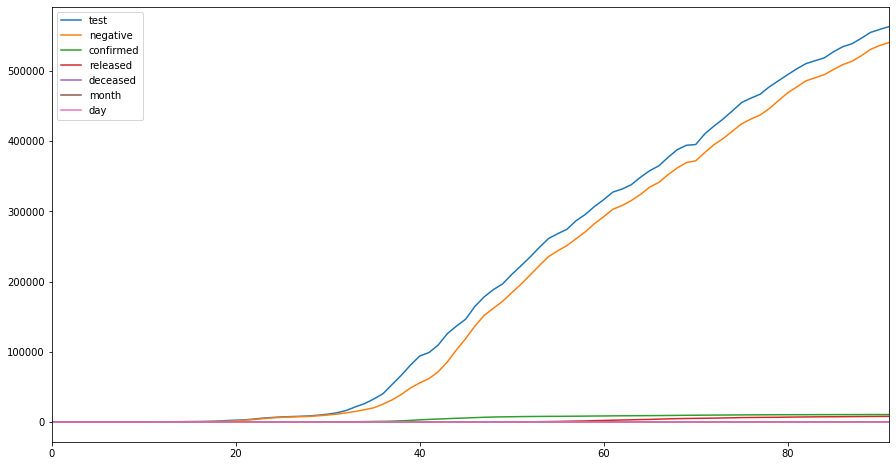

In [102]:
dropped.plot(figsize = (15,8))

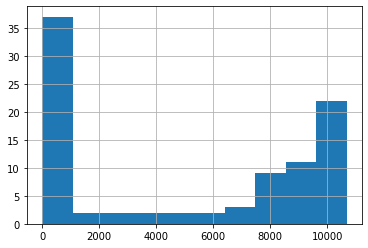

In [108]:
h = dropped['confirmed'].hist(bins = 10)


In [110]:
confirmed = dropped.loc[dropped['confirmed'].notnull(), 'confirmed']
confirmed

0         1
1         1
2         1
3         1
4         2
      ...  
87    10613
88    10635
89    10653
90    10661
91    10674
Name: confirmed, Length: 92, dtype: int64

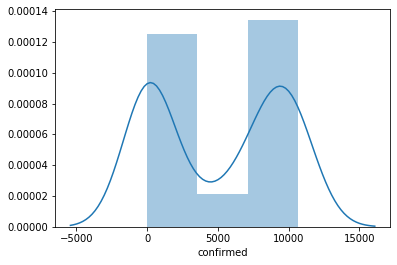

In [111]:
# distplot으로 평당분양가격을 표현해 봅니다.
sns.distplot(confirmed)

In [124]:
t = pd.pivot_table(dropped, index = 'month', values = 'confirmed').round()

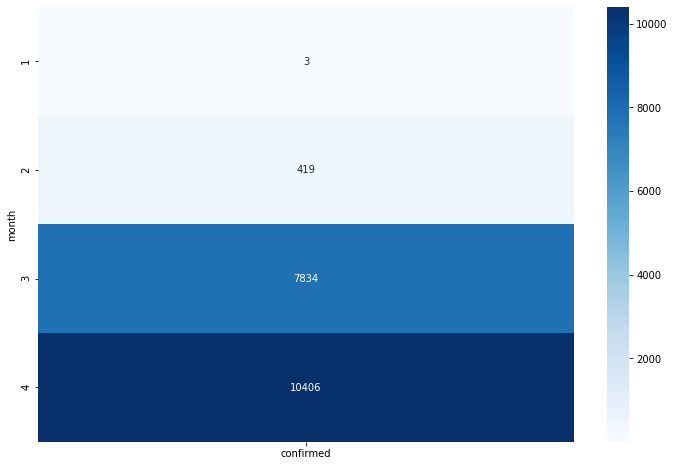

In [125]:
plt.figure(figsize = (12,8))
sns.heatmap(t, cmap = "Blues", annot = True, fmt = ".0f")